## 10-1 대통령 연설문 텍스트 마이닝
1. 텍스트 마이닝(text mining) : 문자로 된 데이터로 부터 가치있는 정보를 얻어내는 기법
- 형태소 분석(morphology analysis) : 텍스트 마이닝의 첫 번째 작업으로, 문자를 구성하는 어절의 품사를 파악
- 형태소 분석을 통해 어절의 품사를 파악한 다음 명사, 동사, 형용사 등의 의미를 지닌 품사를 추출하여 얼마나 많이 사용되었는지 확인
- 텍스트 마이닝을 이용하여 SNS나 웹사이트에 올라온 글을 분석할 수 있음


### Lab 1 : KoNLPy 패키지(한글 텍스트 형태소 분석) 설치하기 - 실습용 PC에는 설치되어 있음
1. 자바 설치 - 자바가 먼저 설치 되어 있어야 함
2. KoNLPy 의존성 패키지 설치하기
- 의존성 패키지 : 다른 패키지의 기능을 이용하는 경우, 다른 패키지를 먼저 설치해야 작동
- pip install jpype1 설치
3. KoNLPy 설치 하기
- pip install konlpy
- KoNLPy(“코엔엘파이”라고 읽습니다)는 한국어 정보처리를 위한 파이썬 패키지
4. NLP란 무엇인가요?
- NLP (Natural Language Processing, 자연어처리)는 텍스트에서 의미있는 정보를 분석, 추출하고 이해하는 일련의 기술집합입니다.
- 품사 태깅 은 형태소의 뜻과 문맥을 고려하여 그것에 마크업을 하는 일
> 가방에 들어가신다 -> 가방/NNG + 에/JKM + 들어가/VV + 시/EPH + ㄴ
> 다/EFN

- KoNLPy를 설치하면 다음의 4개 형태소 분석기를 사용 가능 : Kkma(꼬꼬마),Komoran,Hannanum(한나눔),Okt (previous Twitter)
    - Hannanum(한나눔) : 정제된 텍스트에 사용하는 형태소 분석기
    - Kkma(꼬꼬마) : 띄어쓰기 오류에 덜 민감하여 댓글 분석에 많이 이용하는 형태소 분석기
- 형태소 :
    - 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위
    - 문법적·관계적인 뜻만을 나타내는 단어 또는 단어의 부분.

## Lab 2 : 가장 많이 사용된 단어 알아보기
- 문재인 대통령 대선 출마 선언문을 사용한 텍스트 마이닝
- 문법 오류가 없는 정제된 문장으로 전처리 작업이 많지 않은 텍스트

1. 연설문 불러오기

In [1]:
moon = open('speech_moon.txt', encoding = 'UTF-8').read()
moon

'정권교체 하겠습니다!\n  정치교체 하겠습니다!\n  시대교체 하겠습니다!\n  \n  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다. 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n\n‘우리나라 대통령’이 되겠습니다.\n\n\n존경하는 국민 여러분!\n  \n  저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다. 소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다. 제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n\n이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n\n국민이 모두 아픕니다.\n\n제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고, 우리가 처한 현실이 너무도 엄중

2. 불필요한 문자 제거하기
- 특수문자, 한자 등 한글이 아닌 문자를 제거
- re.sub()를 활용하여 한글이 아닌 모든 문자를 공백으로 변경

In [2]:
# 불필요한 문자 제거
import re

In [3]:
# 두 번째 파라미터가 공백 문자임을 주의
moon = re.sub('[^가-힣]', ' ', moon)
moon

'정권교체 하겠습니다    정치교체 하겠습니다    시대교체 하겠습니다        불비불명       이라는 고사가 있습니다  남쪽 언덕 나뭇가지에 앉아   년 동안 날지도 울지도 않는 새  그러나 그 새는 한번 날면 하늘 끝까지 날고  한번 울면 천지를 뒤흔듭니다   그 동안 정치와 거리를 둬 왔습니다  그러나 암울한 시대가 저를 정치로 불러냈습니다  더 이상 남쪽 나뭇가지에 머무를 수 없었습니다  이제 저는 국민과 함께 높이 날고 크게 울겠습니다  오늘 저는 제  대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다     우리나라 대통령 이 되겠습니다    존경하는 국민 여러분       저는 대통령이 되겠습니다  우리나라 대통령이 되겠습니다  소수 특권층의 나라가 아니라 보통사람들이 주인인  우리나라   네 편 내 편 편가르지 않고 함께 가는 우리나라   우리 라는 말이 조금도 부끄럽지 않은  진정한  우리나라 의 대통령이 되겠습니다   지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다  나라의 주인으로 행세하지 못했고  주인으로 대접받지 못했습니다  나서서 말도 하지 못했습니다  이제 몸을 일으켜 날아야 합니다  당당하게 말하고 정치에 참여해야 합니다   제가 추구하는  우리나라 는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다  저는 시민과 동행하는 정치를 하고 싶습니다  제가 추구하는  우리나라 는 특권과 불평등의 나라가 아니라  보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다   이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다  힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제  낡은 정치  낡은 권력도 모두 끝났습니다  오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다   국민이 모두 아픕니다   제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고  우리가 처한 현실이 너무도 엄중하기 때문입니다  근본적인 혁신  거대한 전

3. 명사 추출하기 
- 문장에서 명사만을 추출하여 분석해보자

In [4]:
# hannanum 만들기
import konlpy
hannanum = konlpy.tag.Hannanum()

In [5]:
# 형태소와 종류까지 추출하기 (N 명사, J 조사 등)
hannanum.pos('대한민국의 영토는 한반도와 그 부속도서로 한다')

[('대한민국', 'N'),
 ('의', 'J'),
 ('영토', 'N'),
 ('는', 'J'),
 ('한반도', 'N'),
 ('와', 'J'),
 ('그', 'M'),
 ('부속도서', 'N'),
 ('로', 'J'),
 ('하', 'P'),
 ('ㄴ다', 'E')]

In [6]:
# 형태소 종류 알파벳의 의미 확인
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [7]:
# 명사 추출하기
hannanum.nouns('대한민국의 영토는 한반도와 그 부속도서로 한다')

['대한민국', '영토', '한반도', '부속도서']

In [8]:
# 형태소 단위로 추출하기
hannanum.morphs('대한민국의 영토는 한반도와 그 부속도서로 한다')

['대한민국', '의', '영토', '는', '한반도', '와', '그', '부속도서', '로', '하', 'ㄴ다']

In [9]:
# 연설문에서 명사 추출하기
nouns = hannanum.nouns(moon)
nouns[:20]

['정권교체',
 '정치교체',
 '시대교체',
 '불비불명',
 '고사',
 '남쪽',
 '언덕',
 '나뭇가지',
 '년',
 '동안',
 '새',
 '한번',
 '하늘',
 '끝',
 '한번',
 '천지',
 '동안',
 '정치',
 '거리',
 '암울한']

In [10]:
# 데이터 프레임으로 변환
import pandas as pd
df_word = pd.DataFrame( {'word' : nouns})
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


4. 단어 빈도표 만들기

In [11]:
# 글자 수(count) 파생 변수 추가
df_word['word_n'] = df_word['word'].str.len()
df_word

,word,word_n
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [12]:
# 단어 중 2글자 이상의 단어만 남기기
df_word = df_word.query('word_n >= 2')
df_word.sort_values('word')

,word,word_n
752,가동,2
1164,가사,2
275,가슴,2
1356,가슴,2
1179,가족,2
...,...,...
195,희망,2
1015,희망,2
1074,희망,2
1128,희생,2


In [13]:
# 단어 빈도 구하기
df_word = df_word.groupby('word', as_index=False)\
                .agg(n = ('word', 'count'))\
                .sort_values('n', ascending=False)
df_word

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


5. 단어 빈도 그래프 만들기

In [14]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
525,정치,10
423,우리나라,10
304,사회,9


<AxesSubplot:xlabel='n', ylabel='word'>

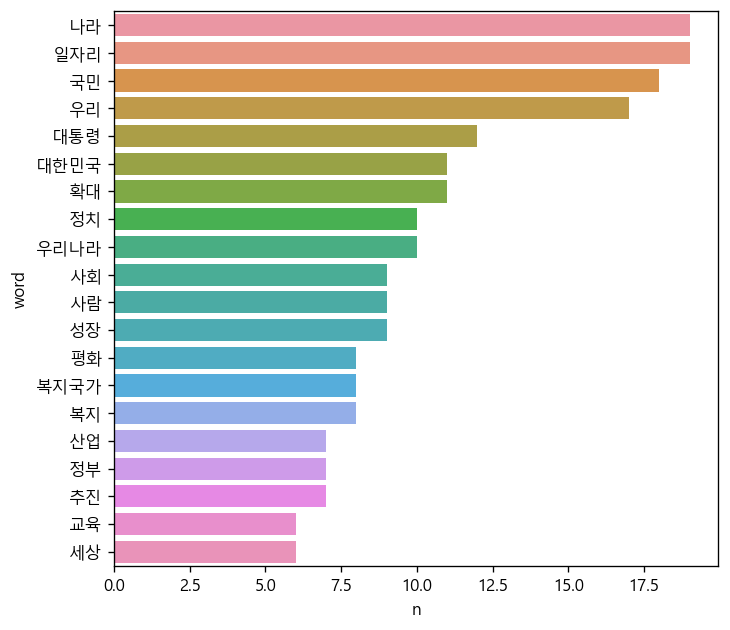

In [15]:
# 막대 그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트, 해상도, 가로 세로 크기

plt.rcParams.update({'font.family' : 'malgun Gothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})
sns.barplot(data=top20, y='word', x='n')

- '일자리', '복지국가' 등의 단어 구성으로 일자리 문제를 해결하고 복지국가를 지향하겠다는 의사를 표현했다는 것을 알 수 있음

## Lab 3 : 워드 클라우드 만들기
- 워드 클라우드(word cloud)는 단어의 빈도를 구름 모양으로 표현한 그래프
- 어떤 단어가 얼마나 사용됐는지 파악하기 쉽다.

1. wordcloud 패키지 설치

In [16]:
!pip install wordcloud

2. 한글 폰트 설정하기
- 워드 클라우드에 한글을 표현화려면 한글 폰트를 사용하도록 설정해야 함
- 배달의 민족 도현체 폰트 설치

In [17]:
font = 'DoHyeon-Regular.ttf'

3. 단어와 빈도를 담은 딕셔너리 만들기
- 워드 클라우드는 딕셔너리 자료구조를 활용하여 만듦
- df_word는 데이터 츠레임으로 딕셔너리로 변화하여 사용

In [18]:
df_word.head()

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12


In [19]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'나라': 19,
 '일자리': 19,
 '국민': 18,
 '우리': 17,
 '대통령': 12,
 '대한민국': 11,
 '확대': 11,
 '정치': 10,
 '우리나라': 10,
 '사회': 9,
 '사람': 9,
 '성장': 9,
 '평화': 8,
 '복지국가': 8,
 '복지': 8,
 '산업': 7,
 '정부': 7,
 '추진': 7,
 '교육': 6,
 '세상': 6,
 '경쟁': 6,
 '보통사람들': 5,
 '공평': 5,
 '경제': 5,
 '대통령의': 5,
 '상생': 5,
 '정규직': 5,
 '정의': 4,
 '결과': 4,
 '사회적': 4,
 '투자': 4,
 '주인': 4,
 '전환': 4,
 '때문': 4,
 '모델': 4,
 '요구': 4,
 '희망': 4,
 '창출': 4,
 '역사': 4,
 '기회': 4,
 '여성': 4,
 '담쟁': 4,
 '강화': 4,
 '아래': 4,
 '고통': 4,
 '약자': 4,
 '아이들': 4,
 '중소기업': 4,
 '공정': 3,
 '문재인': 3,
 '특권': 3,
 '국가': 3,
 '사람들': 3,
 '노인': 3,
 '변화': 3,
 '비중': 3,
 '교육혁신': 3,
 '관계': 3,
 '질서': 3,
 '군대': 3,
 '지원': 3,
 '과도한': 3,
 '권력': 3,
 '부담': 3,
 '그것': 3,
 '지방': 3,
 '국민들': 3,
 '채택': 3,
 '소수': 3,
 '세계': 3,
 '신산업': 3,
 '시민': 3,
 '개선': 3,
 '혁신': 3,
 '혁명': 3,
 '양극화': 3,
 '원칙': 3,
 '활용': 3,
 '행복': 3,
 '원전': 3,
 '에너지': 3,
 '경제성장': 3,
 '세금': 3,
 '이명박': 3,
 '성장전략': 3,
 '가치': 3,
 '가지': 3,
 '여러분': 3,
 '강자': 3,
 '진정한': 2,
 '노동자들': 2,
 '마음속': 2,
 '노력': 2,
 '만큼': 2,
 '육성': 2,
 '모두

4. 워드 클라우드 만들기

In [20]:
from wordcloud import WordCloud

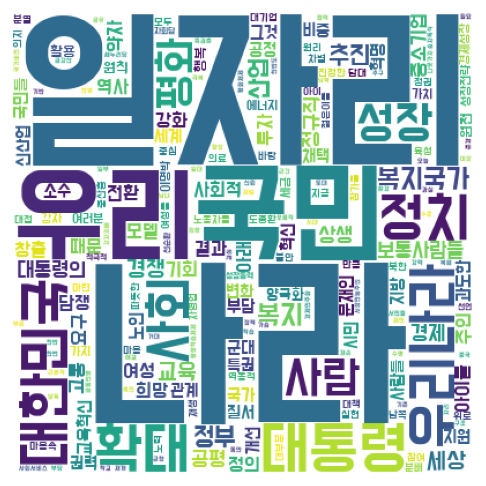

In [21]:
# wc 만들기
# 난수고정(항상 같은 모양으로 생성), 폰트 설정, 가로크기, 세로크기, 배경색
wc = WordCloud(random_state = 1234,
              font_path = font,
              width = 400,
              height = 400,
              background_color = 'white')

# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
# 자주 사용한 단어는 크게 표시됨
# 액자 사이즈, 테두리 선 없얘기
plt.figure(figsize = (5, 5))
plt.axis('off')
plt.imshow(img_wordcloud)

## Lab 4 : 워드 클라우드 모양 바꾸기
- WordCloud()의 mask를 이용하여 워드 클라우드(word cloud) 모양을 바꿀 수 있음

1. mask 만들기 
- PIL(Python Imaging Library) : 이미지 분석 및 처리를 쉽게 할 수 있는 라이브러리
- 픽셀 단위 조작
- 마스킹 및 투명도 제어
- 흐림, 윤곽 보정, 윤곽 검출 등 이미지 필터
- 선명도, 밝기, 명암 보정 등 화상 조정
- 이미지에 텍스트 추가하기

In [22]:
import PIL

In [23]:
# 구름 이미지 불러오기, 배경이 투명해야 함
# 구름 모양의 이미지 경계가 뚜렸한 png 파일
# 마스크가 될 이미지 파일 불러오기
icon = PIL.Image.open('cloud.png')

In [24]:
print(f'이미지 파일 이름 : {icon.filename}')
print(f'이미지 파일 형식 : {icon.format}')
print(f'이미지 파일 크기 : {icon.size}')            
print(f'이미지 색상 모드 : {icon.mode}')
print(f'이미지 가로 크기 : {icon.width}')
print(f'이미지 세로 크기 : {icon.height}')

이미지 파일 이름 : cloud.png
이미지 파일 형식 : PNG
이미지 파일 크기 : (825, 467)
이미지 색상 모드 : RGBA
이미지 가로 크기 : 825
이미지 세로 크기 : 467


In [25]:
icon.show()

2. 워드 클라우드 만들기

In [32]:
# 구름 이미지로 mask 만들기
import numpy as np
\
# 흰색 캠퍼스 만들기
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))

# 흰색 캠퍼스 이미지(0,0)에 icon 이미지(첫번째 파라미터)를 부착함
# icon 이미지(두번째 파라미터)를 mask 이미지로 사용함
img.paste(icon, icon)

# mask 파일 생성
img = np.array(img)

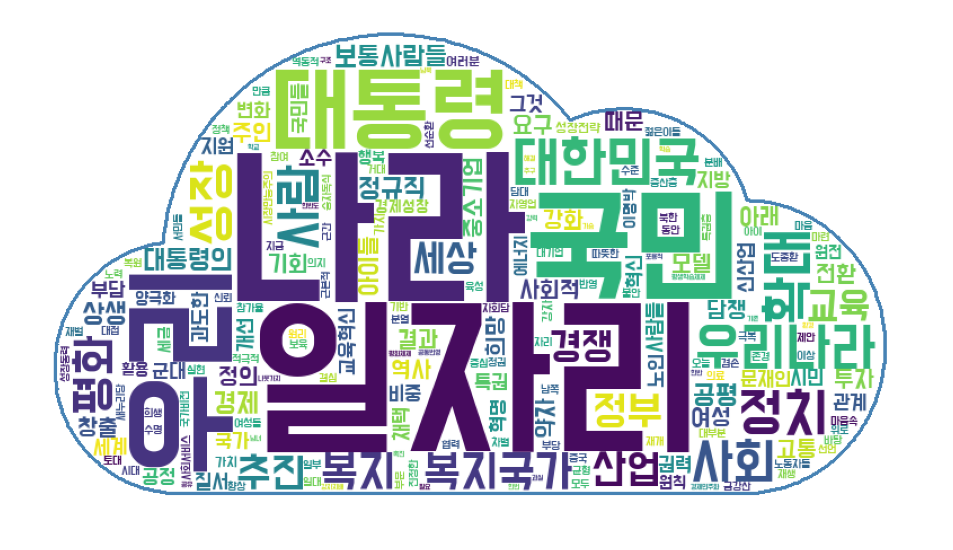

In [33]:
# wc 만들기
wc = WordCloud(random_state=1234,
               font_path = font,
               width = 400,
               height = 400,
               contour_width=3,               # 테두리 굵기
               contour_color='steelblue',    # 테두리 색
               background_color = 'white',
               mask = img)                   # 배경으로 사용할 이미지

# 구름 이미지로 mask 만들기# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

## Lab 5 : 워드 클라우드 색깔 바꾸기
- inferno 컬러맵 적용

In [34]:
# wc 만들기
wc = WordCloud(random_state=1234,
              font_path = font,
              width = 400,
              height = 400,
              background_color = 'white',
              mask = img,
              colormap = 'inferno')        # 컬러맵 설정

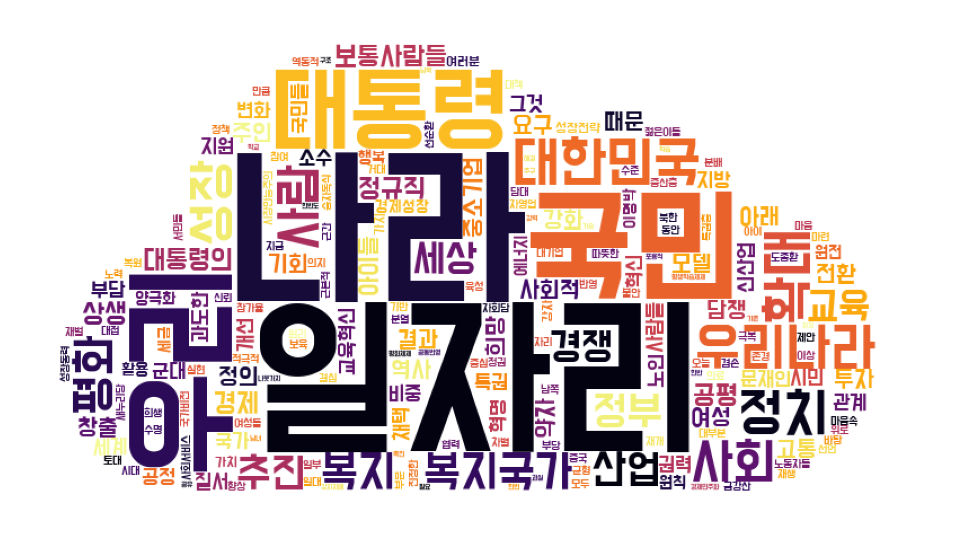

In [35]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

## 10-2 기사 댓글 텍스트 마이닝
- 2020년 9월 21일 방탄소년단이 '빌보드 핫 100차트' 1위에 오른 소식을 다룬 네이버 뉴스 댓글 분석


## Lab 6 : 가장 많이 사용된 단어 알아보기

1. 기사 댓글 불러오기

In [36]:
# 데이터 불러오기
# naver 뉴스 댓글 파일
import pandas as pd
df = pd.read_csv('news_comment_BTS.csv', encoding='UTF-8')

In [37]:
df.head()

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...


In [38]:
# 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


2. 불필요한 문자 제거하기
- 댓글(reply)에서 불필요한 문자 제거

In [39]:
# 불필요한 문자 제거하기
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex=True)
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

3. 명사 추출하기
- 꼬꼬마(Kkma) 형태 분석기 사용
- 꼬고마 형태소 분석기는 띄어쓰기 오류가 있는 문장에서도 형태소를 잘 출력
- 댓글처럼 정제되지 않은 텍스트 분석시 적합

In [40]:
# Kkma 만들기
import konlpy
kkma = konlpy.tag.Kkma()

In [41]:
# 꼬꼬마 형태소 분석기로 명사 추출
nouns = df['reply'].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

4. 단어 빈도표 만들기
- 꼬고마 형태소 분석기는 행마다 여러 단어가 리스트 자료 구조에 들어감
- df.explode()로 한 행에 한 단어만 들어가도록 함

In [42]:
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

> 두 글자 이상 단어만 남기기

In [43]:
# 데이터 프레임 만들기
type(nouns)

pandas.core.series.Series

In [44]:
df_word = pd.DataFrame({'word' : nouns})
df_word.head()

,word
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트


In [48]:
# 글자 수 추가
df_word['count'] = df_word['word'].str.len()
df_word.head()

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0


In [49]:
# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word.head()

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0


In [51]:
# 빈도표 만들기
df_word = df_word.groupby('word', as_index=False)\
                .agg(n = ('word', 'count'))\
                .sort_values('n', ascending=False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


5. 단어 빈도 막대 그래프 만들기

In [52]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


<AxesSubplot:xlabel='n', ylabel='word'>

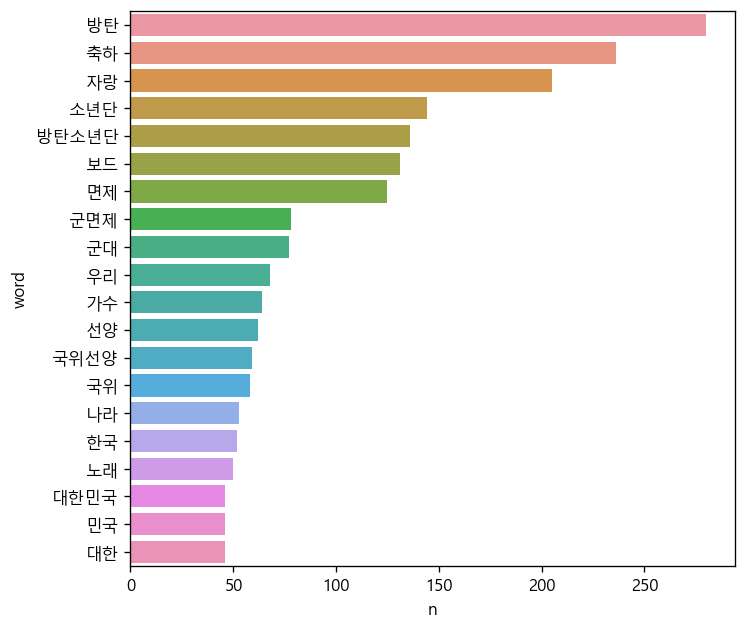

In [53]:
# 가로 세로 크기 결정
plt.rcParams.update({'figure.figsize' : [6.5, 6]})

# 막대 그래프 만들기
sns.barplot(data=top20, y='word', x='n')

- 출력된 그래프를 보면 '방탄', '축하', '자랑', '국위선양', '대한민국' 등 단어 빈도 높음
- 칭찬 댓글이 많음을 알 수 있음
- 군대, 면제, 군면제 등 단어도 많아 BTS 병역 의무 면제에 대한 댓글도 많음

## Lab 7 : 워드 클라우드 만들기

칼라맵의 종류 확인 https://bit.ly/easypy_104

In [54]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']

In [55]:
# wc 만들기
wc = WordCloud(random_state=1234,
               font_path = font,
               width = 400,
               height = 400,
               background_color = 'white',
               mask = img,
               colormap = 'inferno')

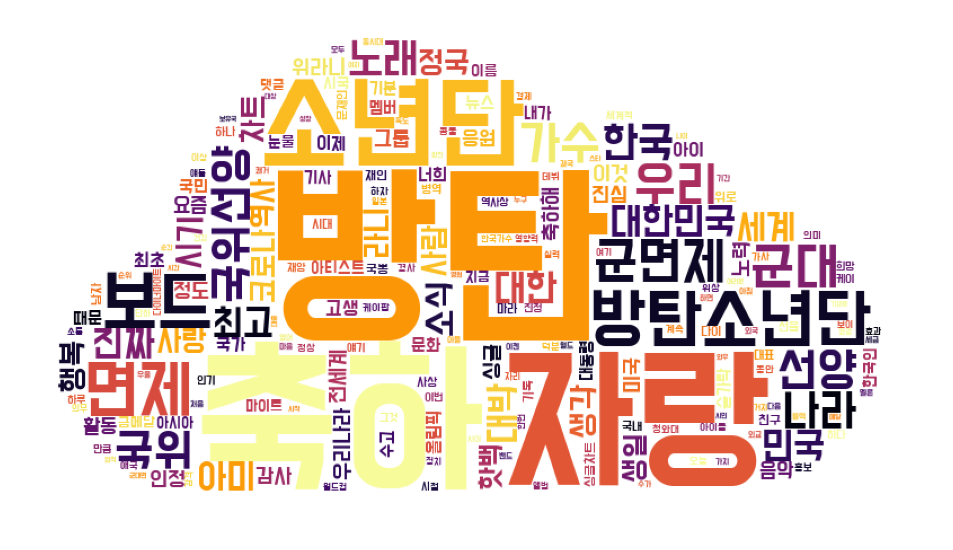

In [56]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)